In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
import quintic_polynomials_planner as qp
import math
from pycubicspline import * 
import pure_pursuit
from matplotlib import animation

In [2]:
class car:
    def __init__(self, x, y, v, a, yaw, dotlist, dist_goal):
        self.carstate = dots(x, y, v, a, yaw)
        self.traj = trajectory(dotlist, dist_goal)
        self.traj.update_start(self.carstate)
        self.traj.gen_trajectory()
    
    def move_car(self, x, y, v, yaw, new_points):
        self.update_state(x, y, v, yaw):
        self.traj.update_start(self.carstate) # updated only when the car is close enough to the closest waypoint
        if new_points:
            self.traj.gen_trajectory() # recompute the trajectory to the actual state
    
    
    def reached_goal():
        return traj.reached_final_goal()
    
    def add_goal(next_goal):
        self.trajectory.update_goal(next_goal)

class dots:
    def __init__(self, x, y, v, yaw, a =0):
        self.x = x
        self.y = y
        self.yaw = yaw
        self.v = v
        #self.a = a
        self.vx = v*math.cos(yaw)
        self.vy = v*math.sin(yaw)
        #self.ax = a*math.cos(yaw)
        #self.ay = a*math.sin(yaw)
        
        
    def update_state(self,x, y, v, a, yaw):
        """
        Update coordinates for the car
        """
        self.x=x
        self.y=y
        self.yaw = yaw
        self.v = v
        self.a = a
        self.vx = v*math.cos(yaw)
        self.vy = v*math.sin(yaw)
        self.ax = a*math.cos(yaw)
        self.ay = a*math.sin(yaw)
        
        
        
        
class trajectory:
    def __init__(self, dotlist, close_dist):
            self.dotlist=dotlist #Dots to be trajectorized
            self.dist = close_dist #Maximum distance
                                   # between the car state and the closest waypoint 
    
    def update_goal(self, dot_goal):
        """
        Called each time a new goal point is added
        """
        self.dotlist.append(dot_goal)   
    def close_enough(self, car_state, curr_dot ):
        """
        Check if car has passed a dot in the trajectory
        """
        dist = math.sqrt((curr_dot.x-car_state.x)**2+(curr_dot.y-car_state.y)**2)
        return dist < self.dist
    
    def update_start(self, car_state):
        if self.close_enough(car_state, self.dotlist[1]):
            del self.dotlist[1]
            return True
        self.dotlist[0] = car_state
        return False    
    def gen_trajectory(self):
        """
        Trajectory generator
        """
        # do stuff here
        #x_trajectory = linspace(self.start, self.) 
        dt = 0.01
        max_accel = 10
        self.x_ref = []
        self.y_ref = []
        self.v_ref = []
        self.a_ref = []
        self.yaw_ref = []
        mode = 1
        if mode == 0:
            for i in range(len(self.dotlist)-1):


                curr_dot = self.dotlist[i]

                goal_dot = self.dotlist[i+1]  
                print(goal_dot.x)
                # Get the point coordinate, the first one is the car position

                [time,rx,ry,ryaw,rv,ra] = qp.quinic_polynomials_planner(sx=curr_dot.x, sy=curr_dot.y, sv=curr_dot.v,
                                                                        syaw=curr_dot.yaw, sa=curr_dot.a, gx=goal_dot.x,
                                                                        gy = goal_dot.y, gv = goal_dot.v, ga = goal_dot.a,
                                                                       gyaw = goal_dot.yaw, dt = dt, max_accel = max_accel)


                self.x_ref.extend(rx)
                self.y_ref.extend(ry)
                self.v_ref.extend(rv)
                self.a_ref.extend(ra)
                self.yaw_ref.extend(ryaw)
        if mode == 1:
            x = []
            y = []
            
            
            for i in range(len(self.dotlist)):
                x.append(self.dotlist[i].x)
                y.append(self.dotlist[i].y)
            
            sp = Spline2D(x, y)
            s = np.arange(0, sp.s[-1], 0.1)
            rx, ry, ryaw, rk = [], [], [], []
            for i_s in s:
                ix, iy = sp.calc_position(i_s)
                rx.append(ix)
                ry.append(iy)
                ryaw.append(sp.calc_yaw(i_s))
                rk.append(sp.calc_curvature(i_s))
            
            self.x_ref = rx
            self.y_ref = ry
            self.yaw_ref = ryaw
            
            
            
            
    def get_next_traj(self):
        return dots(x_vec[0], y_vec[0], 0)
    
    def reached_final_goal(self):
        return close_enough(dotlist[0], dotlist[-1])
        
    def return_goal(self):
        return self.dotlist[-1]
        

        

In [3]:

math.pi/4


0.7853981633974483

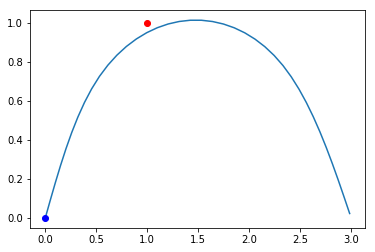

0.7853981633974483


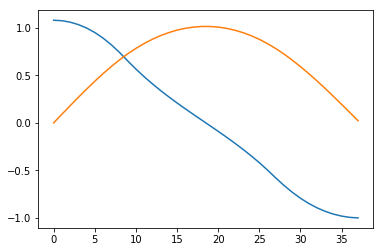

TypeError: pure_pursuit_sim() missing 2 required positional arguments: 'cx' and 'cy'

In [5]:
point_1 = dots(x=0, y=0, v=0.1, a=0.0, yaw=math.pi/4)
point_2 = dots(x=0.5, y=0.7, v=0.1, a=0.2, yaw = 0.8*math.pi/4)
point_3 = dots(x = 2.3, y=0.8, v=0.1, a=0.2, yaw = -0.8*math.pi/4)
point_4 = dots(x=3, y=0, v=0.1, a=0.2, yaw = -math.pi/4)
waypoints = [point_1, point_2, point_3, point_4]
car_1 = car(x=0, y=0, v=0, a=0,yaw=math.pi/4, dist_goal=0.1, dotlist=waypoints)
traj = car_1.traj
x = traj.x_ref
y = traj.y_ref
#print(x)

plt.plot(x,y)
plt.plot(0, 0, 'bo' )
plt.plot(1,1, 'ro')
plt.show()
print(point_1.yaw)
plt.plot(traj.yaw_ref)
plt.plot(y)
plt.show()


pure_pursuit.pure_pursuit_sim(x_0=0, y_0=0, yaw_0=0, v_0=0)